# MENGAMBIL DATA

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data
saham = data.DataReader('UNVR', 'yahoo',start='1/1/2019')
saham

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,17.910000,16.959999,17.430000,17.799999,3066000,17.799999
2019-01-03,18.160000,17.270000,17.930000,17.530001,1615600,17.530001
2019-01-04,18.770000,17.870001,17.950001,18.490000,2272500,18.490000
2019-01-07,19.410000,18.280001,18.500000,19.150000,1893000,19.150000
2019-01-08,19.860001,19.219999,19.400000,19.650000,2381800,19.650000
...,...,...,...,...,...,...
2020-12-09,18.950001,18.620001,18.650000,18.910000,1458200,18.910000
2020-12-10,18.780001,18.520000,18.670000,18.530001,1430700,18.530001
2020-12-11,18.600000,18.100000,18.600000,18.100000,1235700,18.100000


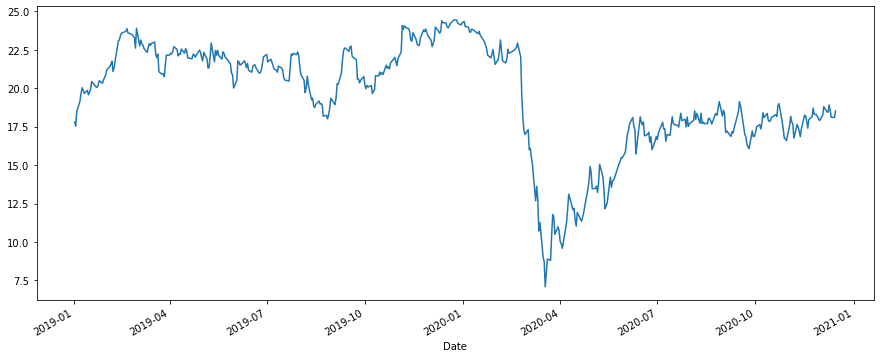

In [2]:
data = saham['Adj Close']
data.plot(figsize=(15,6))

# Menghitung Mean dan standar deviasi

In [3]:
hari = (saham.index[-1] - saham.index[0]).days
mean = (saham['Adj Close'][-1] / saham['Adj Close'][1]) ** (365.0/hari) - 1

std = saham['Adj Close'].pct_change().std()
jumlah_hari = 252
std = std * math.sqrt(jumlah_hari)

print ("shock    : ", str(round(mean,4)))
print ("drift    : ", str(round(std,4)))

shock    :  0.0285
drift    :  0.564


# Generate random values

In [4]:
random = np.random.normal(mean/jumlah_hari, std/math.sqrt(jumlah_hari),jumlah_hari)+1
random

array([1.01395666, 0.9952633 , 1.00836576, 0.92023849, 1.07800148,
       1.0162795 , 0.97407684, 0.98769188, 1.07565624, 0.9027997 ,
       0.99275171, 1.00067868, 1.01161039, 0.95344723, 0.93733681,
       0.97477597, 1.00037154, 0.97494772, 1.05285718, 0.93072684,
       0.95417382, 0.97376182, 1.04147406, 1.06869464, 1.00671715,
       0.96708506, 0.96466788, 0.98132896, 1.02188736, 0.98853236,
       0.96629708, 1.01951669, 0.97706044, 0.99678589, 1.02245296,
       0.97183342, 0.97271813, 0.99455791, 0.98256758, 0.99866845,
       0.9646669 , 1.01656004, 1.06309681, 0.98764429, 1.01733758,
       1.01608061, 0.96450829, 0.99198786, 0.98682089, 1.02396397,
       1.02677352, 1.01587296, 0.95746061, 0.97258152, 0.97432047,
       1.01539527, 1.01059228, 1.01568937, 0.9573509 , 1.02947662,
       0.98238095, 0.94787103, 1.03268794, 1.01682807, 1.02767642,
       0.98848811, 1.00607605, 1.01592672, 1.08526551, 0.98167973,
       0.98042242, 1.07705325, 1.01246487, 0.89683345, 1.04474

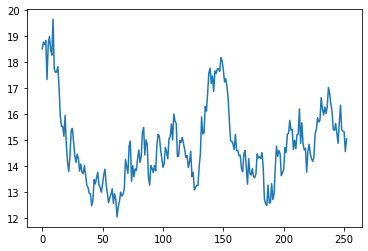

In [5]:
S = saham['Adj Close'][-1]
prediksi = [S]

for j in random:
    prediksi.append(prediksi[-1] * j)
     
plt.plot(prediksi)
plt.show()

In [6]:
prediksi

[18.520000457763672,
 18.778477788480576,
 18.68952976672815,
 18.845881975528993,
 17.342706021178053,
 18.695462727242116,
 18.9998154540792,
 18.507280123290027,
 18.279490222168572,
 19.662447756142747,
 17.75125193328387,
 17.62258566946601,
 17.63454576289162,
 17.839289697036396,
 17.008821288245464,
 15.942994282821681,
 15.540847712645448,
 15.546621693582292,
 15.157143328252529,
 15.958307250714181,
 14.852824837314706,
 14.172176606778791,
 13.800324540577991,
 14.37268004514491,
 15.360006160123849,
 15.463181558705813,
 14.95421182482797,
 14.425847768127824,
 14.156502172518408,
 14.466350604048298,
 14.300455733841149,
 13.818488551891178,
 14.08817975399277,
 13.765003100607888,
 13.720760862015888,
 14.028832546304894,
 13.633688302069709,
 13.261735805850707,
 13.189564282845764,
 12.959638256914113,
 12.942381807289147,
 12.48508731043525,
 12.691840822314427,
 13.492655486363356,
 13.325944179836268,
 13.55698382221238,
 13.774988372714041,
 13.286090473799105,
 13

# IMPLEMENTASI

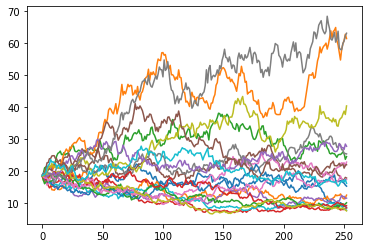

In [7]:
number_of_trials = 20

closing_prices = [S]

for i in range(number_of_trials):
    random = np.random.normal(mean/jumlah_hari, std/math.sqrt(jumlah_hari),jumlah_hari)+1
    prediksi = [saham['Adj Close'][-1]]

    for j in random:
        prediksi.append(prediksi[-1] * j)

    plt.plot(prediksi)
 
    closing_prices.append(prediksi[-1])

plt.show()

# HASIL ANALISI

In [8]:
mean_end_price = round(np.mean(closing_prices),2)
print("Expected price: ", str(mean_end_price))

Expected price:  21.31


In [9]:
import pandas as pd

df = pd.DataFrame(closing_prices)

In [10]:
df.describe()

,0
count,21.000000
mean,21.307004
std,15.880830
min,7.498776
25%,10.041734
50%,17.323001
75%,24.481547
max,63.095741


In [11]:
top_ten = np.percentile(closing_prices,99)
bottom_ten = np.percentile(closing_prices,1);
print ("Reward  : ", str(round(top_ten,2)))
print ("Risk    : ", str(round(bottom_ten,2)))

Reward  :  62.76
Risk    :  7.54


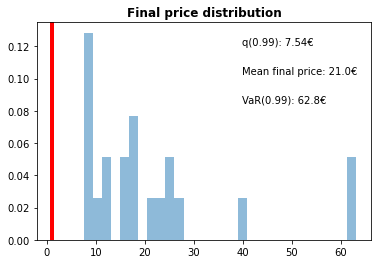

In [12]:
plt.hist(closing_prices, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.7, "Mean final price: {:.3}€".format(round(np.mean(closing_prices))))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}€".format(np.percentile(closing_prices,99)))
plt.figtext(0.6, 0.8, "q(0.99): {:.3}€".format(np.percentile(closing_prices,1)))
plt.axvline(x=1, linewidth=4, color="r")
plt.title("Final price distribution", weight="bold");

## IMPLEMENTASI

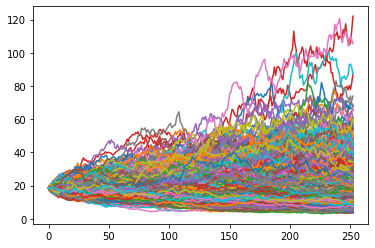

In [13]:
number_of_trials = 1000

closing_prices = [S]

for i in range(number_of_trials):
    random = np.random.normal(mean/jumlah_hari, std/math.sqrt(jumlah_hari),jumlah_hari)+1
    prediksi = [saham['Adj Close'][-1]]

    for j in random:
        prediksi.append(prediksi[-1] * j)

    plt.plot(prediksi)
 
    closing_prices.append(prediksi[-1])

plt.show()

# HASIL ANALISI

In [14]:
import pandas as pd

df = pd.DataFrame(closing_prices)
df

,0
0,18.520000
1,17.397487
2,10.362267
3,23.585738
4,122.056912
...,...
996,12.902580
997,11.088419
998,15.961510
999,11.286620


In [15]:
df.describe()

,0
count,1001.000000
mean,19.493823
std,12.706367
min,3.572399
25%,10.998232
50%,16.162070
75%,23.932720
max,122.056912


In [16]:
mean_end_price = round(np.mean(closing_prices),2)
print("Expected price: ", str(mean_end_price))

Expected price:  19.49


In [17]:
top_ten = np.percentile(closing_prices,99)
bottom_ten = np.percentile(closing_prices,1);
print ("Reward  : ", str(round(top_ten,2)))
print ("Risk    : ", str(round(bottom_ten,2)))

Reward  :  60.99
Risk    :  4.54


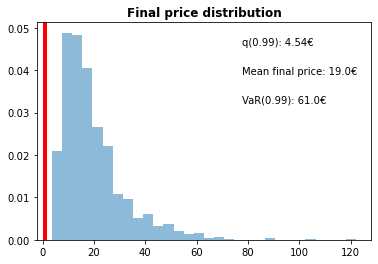

In [18]:
plt.hist(closing_prices, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.7, "Mean final price: {:.3}€".format(round(np.mean(closing_prices))))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}€".format(np.percentile(closing_prices,99)))
plt.figtext(0.6, 0.8, "q(0.99): {:.3}€".format(np.percentile(closing_prices,1)))
plt.axvline(x=1, linewidth=4, color="r")
plt.title("Final price distribution", weight="bold");